# Introduction

K-means is a clustering algorithm that partitions a dataset into k clusters, where each point belongs to the cluster whose centroid is closest to it. The choice of initialization method for k-means can greatly impact the algorithm's performance and convergence. In this lab, we will evaluate the impact of different initialization methods on k-means clustering algorithm's convergence robustness.

# Import Libraries

We will start by importing the necessary libraries for the lab, which includes **numpy**, **matplotlib**, **sklearn**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.utils import shuffle
from sklearn.utils import check_random_state
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

# Generate Datasets

We will generate a dataset of isotropic Gaussian clusters widely spaced. The dataset generation parameters include the number of samples per center, grid size, scale, and the number of clusters.



In [3]:
random_state = np.random.RandomState(0)
n_samples_per_center = 100
grid_size = 3
scale = 0.1
n_clusters = grid_size**2

def make_data(random_state, n_samples_per_center, grid_size, scale):
    random_state = check_random_state(random_state)
    centers = np.array([[i, j] for i in range(grid_size) for j in range(grid_size)])
    n_clusters_true, n_features = centers.shape

    noise = random_state.normal(
        scale=scale, size=(n_samples_per_center, centers.shape[1])
    )

    X = np.concatenate([c + noise for c in centers])
    y = np.concatenate([[i] * n_samples_per_center for i in range(n_clusters_true)])
    return shuffle(X, y, random_state=random_state)

X, y = make_data(random_state, n_samples_per_center, grid_size, scale)

# Quantitative Evaluation of Initialization Methods

We will evaluate the ability of k-means initialization strategies to make the algorithm convergence robust. We will measure the relative standard deviation of the inertia of the clustering, which is the sum of squared distances to the nearest cluster center. The first plot shows the best inertia reached for each combination of the model (**KMeans** or **MiniBatchKMeans**) and the init method (**init="random"** or **init="k-means++"**) for increasing values of the **n_init** parameter that controls the number of initializations.

Evaluation of KMeans with k-means++ init
Evaluation of KMeans with random init
Evaluation of MiniBatchKMeans with k-means++ init
Evaluation of MiniBatchKMeans with random init


Text(0.5, 1.0, 'Mean inertia for various k-means init across 5 runs')

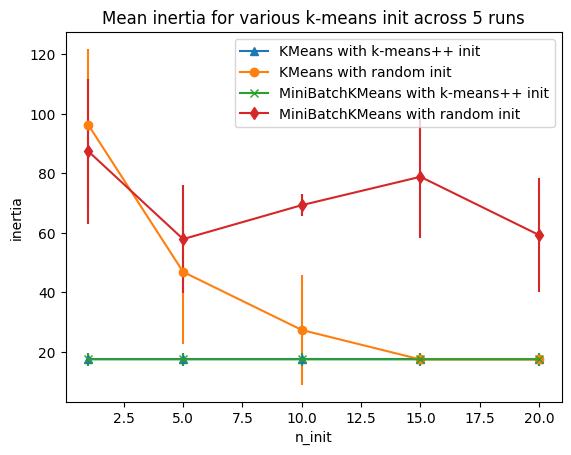

In [4]:
n_runs = 5
n_init_range = np.array([1, 5, 10, 15, 20])

plt.figure()
plots = []
legends = []

cases = [
    (KMeans, "k-means++", {}, "^-"),
    (KMeans, "random", {}, "o-"),
    (MiniBatchKMeans, "k-means++", {"max_no_improvement": 3}, "x-"),
    (MiniBatchKMeans, "random", {"max_no_improvement": 3, "init_size": 500}, "d-"),
]

for factory, init, params, format in cases:
    print("Evaluation of %s with %s init" % (factory.__name__, init))
    inertia = np.empty((len(n_init_range), n_runs))

    for run_id in range(n_runs):
        X, y = make_data(run_id, n_samples_per_center, grid_size, scale)
        for i, n_init in enumerate(n_init_range):
            km = factory(
                n_clusters=n_clusters,
                init=init,
                random_state=run_id,
                n_init=n_init,
                **params,
            ).fit(X)
            inertia[i, run_id] = km.inertia_
    p = plt.errorbar(
        n_init_range, inertia.mean(axis=1), inertia.std(axis=1), fmt=format
    )
    plots.append(p[0])
    legends.append("%s with %s init" % (factory.__name__, init))

plt.xlabel("n_init")
plt.ylabel("inertia")
plt.legend(plots, legends)
plt.title("Mean inertia for various k-means init across %d runs" % n_runs)

# Qualitative Visual Inspection of the Convergence

We will demonstrate one single run of the **MiniBatchKMeans** estimator using an **init="random"** and **n_init=1**. This run leads to a bad convergence (local optimum), with estimated centers stuck between ground truth clusters.

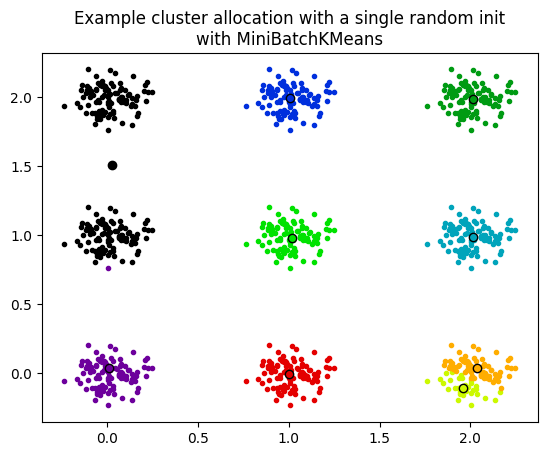

In [5]:
km = MiniBatchKMeans(
    n_clusters=n_clusters, init="random", n_init=1, random_state=random_state
).fit(X)

plt.figure()
for k in range(n_clusters):
    my_members = km.labels_ == k
    color = cm.nipy_spectral(float(k) / n_clusters, 1)
    plt.plot(X[my_members, 0], X[my_members, 1], ".", c=color)
    cluster_center = km.cluster_centers_[k]
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=color,
        markeredgecolor="k",
        markersize=6,
    )
    plt.title(
        "Example cluster allocation with a single random init\nwith MiniBatchKMeans"
    )

plt.show()

# Summary

In this lab, we evaluated the impact of different initialization methods on k-means clustering algorithm's convergence robustness. We measured the relative standard deviation of the inertia of the clustering and demonstrated one single run of the **MiniBatchKMeans** estimator using an **init="random"** and **n_init=1**. The choice of initialization method for k-means can greatly impact the algorithm's performance and convergence.